In [44]:
# ! pip install seaborn
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]

%matplotlib inline


     |████████████████████████████████| 215kB 796kB/s eta 0:00:01


In [61]:
conn = pymysql.connect(
    host='192.168.100.50',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)

curs = conn.cursor()


# 2019-10-09 10:00:00 ~ 2019-10-10 10:00:00 : 10초 데이터 가져오기
sql = "select Item005 from HisItemCurr10Seconds WHERE DataSavedTime between \
    '2019-10-09 10:00:00' and '2019-10-10 10:00:00' ORDER BY DataSavedTime DESC"
curs.execute(sql)

rows=curs.fetchall()
conn.close()

compare_data = list(rows)

# li = list(t)

# 람다식으로 list 만들기 comprehension
# [row for row in map(lambda x: x[0], li) if row != None]

compare_data = list(filter(lambda x: x != None, map(lambda x: x[0], compare_data)))

45.989999999999995


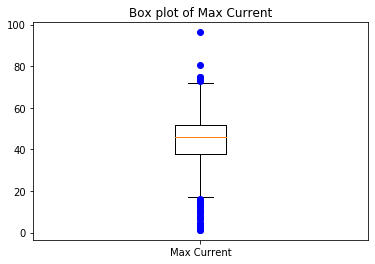

In [63]:
print(np.median(compare_data))
# Basic box plot

plt.boxplot(compare_data, sym="bo")
plt.title('Box plot of Max Current')
plt.xticks([1], ['Max Current'])
plt.show()

30.36


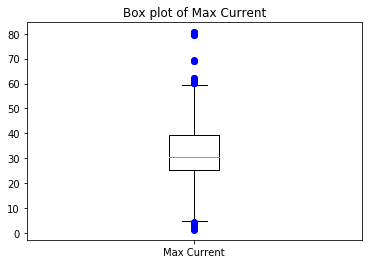

In [66]:
conn2 = pymysql.connect(
    host='192.168.100.50',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)

# 2019-10-10 10:00:00 ~ 2019-10-10 11:00:00 : 1초 데이터 가져오기
sql2 = "select Item005 from HisItemCurrSecond WHERE DataSavedTime between \
    '2019-10-10 10:00:00' and '2019-10-10 11:00:00' ORDER BY DataSavedTime DESC"
curs2 = conn2.cursor()

curs2.execute(sql2)

rows2=curs2.fetchall()

conn2.close()

current_data = list(rows2)
current_data = list(filter(lambda x: x != None, map(lambda x: x[0], current_data)))

print(np.median(current_data))
# Basic box plot

plt.boxplot(current_data, sym="bo")
plt.title('Box plot of Max Current')
plt.xticks([1], ['Max Current'])
plt.show()

45.989999999999995